## 导入需要的库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
# T为了同时支持python 2 和python 3
from __future__ import division, print_function, unicode_literals
# 一个单元格里面所有变量都会输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. 数据获取

## 1.1 读取excel数据

**练习1：读取文件example.xlsx中的数据**

In [2]:
# 在此次完成练习1
exa=pd.read_excel("dataset/example.xlsx",sheet_name=0,names=['时间','水果','销量'])
exa

,时间,水果,销量
0,2015-04-05 03:41:23,Cherries,85
1,2015-04-06 12:46:51,Pears,14
2,2015-04-08 08:59:43,Oranges,52
3,2015-04-10 02:07:00,Apples,152
4,2015-04-10 18:10:37,Bananas,23
5,2015-04-10 02:40:46,Strawberries,98


## 1.2 读取文本数据

In [3]:
pd.read_csv('dataset/iris.csv',names = ['萼片长度','萼片宽度','花瓣长度','花瓣宽度','种类'])

,萼片长度,萼片宽度,花瓣长度,花瓣宽度,种类
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**练习2**：请读取staff.txt文件，要求如下：

·只包含数据的第3行-6行

·数据中没有变量名（列名），读取时需加上

·读取数据时，需要忽略已经离职的员工

·保证数据的编号5位数不变


In [5]:
# 在此次完成练习2
pd.read_csv('dataset/staff.txt',
            skiprows=2,sep=',',
            names=['编号','姓名','性别','职位'],
            skipfooter=1,
            engine='python',
            encoding='utf-8',
            comment='#',
            converters={'编号':str})

,编号,姓名,性别,职位
0,00446,张敏,女,前端工程师
1,00483,李琴,女,Java开发工程师
2,00552,丁顺昌,男,数据分析师


skiprows=2：这个参数用于跳过文件开始的两行。由于数据没有变量名并且你想从第3行开始读取，所以需要跳过前两行。

comment='#': 忽略了以 # 开头的行（即已离职员工的数据行）。

converters={"编号": str}: 保证“编号”列中的数据以字符串格式保存，确保编号的前导零不会丢失。

skipfooter=1: 忽略了文件最后一行的说明性文本。

# 2. 数据探索

## pandas中的数据结构

In [5]:
d = [1,2,2]
pd.Series(d,index=['a','b','c'])

a    1
b    2
c    2
dtype: int64

In [6]:
data = {"姓名": ["小明", "小花"], "年龄": [8, 7]}
pd.Series(data)

姓名    [小明, 小花]
年龄      [8, 7]
dtype: object

In [7]:
d=[[2,2,2],[5,5,5]]
pd.DataFrame(d,index=['a','b'],columns=list('ABC'))

,A,B,C
a,2,2,2
b,5,5,5


## 2.1 查看数据的属性

In [11]:
import pandas as pd
iris_data = pd.read_csv('dataset/iris.csv',names = ['萼片长度','萼片宽度','花瓣长度','花瓣宽度','种类'])
iris_data.head(3)

,萼片长度,萼片宽度,花瓣长度,花瓣宽度,种类
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [12]:
print("1.前2行的值：\n",iris_data[0:2].values)
print("2.第3行的值：\n",iris_data.iloc[2,:].values)
print("3.索引：\n",iris_data.index)
print("4.列名：\n",iris_data.columns)
print("5.类型：\n",iris_data.dtypes)
print("6.元素个数：",iris_data.size)
print("7.维度数：",iris_data.ndim)
print("8.行列数目：",iris_data.shape)
print("9.去重：",iris_data["种类"].unique())

1.前2行的值：
 [[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']]
2.第3行的值：
 [4.7 3.2 1.3 0.2 'Iris-setosa']
3.索引：
 RangeIndex(start=0, stop=150, step=1)
4.列名：
 Index(['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', '种类'], dtype='object')
5.类型：
 萼片长度    float64
萼片宽度    float64
花瓣长度    float64
花瓣宽度    float64
种类       object
dtype: object
6.元素个数： 750
7.维度数： 2
8.行列数目： (150, 5)
9.去重： ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [13]:
iris_data.describe() # 使用.describe()方法展示数据的统计摘要，默认情况下，它提供了数值列的计数、均值、标准差、最小值、四分位数和最大值

,萼片长度,萼片宽度,花瓣长度,花瓣宽度
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
iris_data.drop(['种类','花瓣长度'],axis = 1) # 'axis=1'参数指定我们要从列中删除数据（axis=0用于行）

,萼片长度,萼片宽度,花瓣宽度
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


## 2.2 数据质量分析——是否有缺失值

In [9]:
iris_data.info()#Info()方法可以快速查看数据的描述，特别是总行数、每个属性的类型和非空值的数量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   萼片长度    150 non-null    float64
 1   萼片宽度    150 non-null    float64
 2   花瓣长度    150 non-null    float64
 3   花瓣宽度    150 non-null    float64
 4   种类      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2.3 数据分布分析

#### a. 散点图

In [21]:
import pandas as pd                      # Pandas库用于数据处理
import matplotlib.pyplot as plt          # Matplotlib的pyplot模块用于绘制图形
import seaborn as sns                    # Seaborn库基于Matplotlib，提供更高级的接口和美化图表
from sklearn.model_selection import train_test_split  # train_test_split用于分割数据集
housing = pd.read_csv('dataset\housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


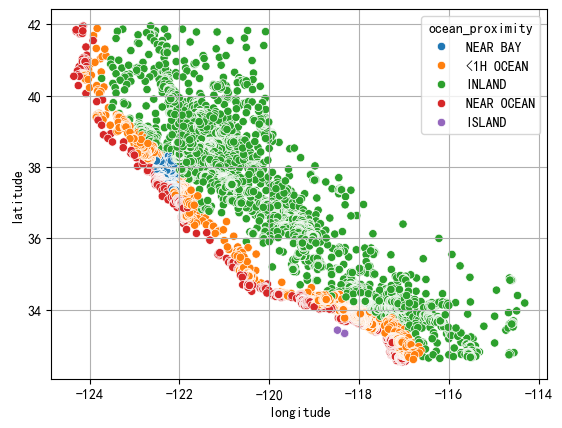

In [22]:
plt.rcParams['font.sans-serif'] = 'SimHei'#黑体，显示中文
plt.rcParams['axes.unicode_minus'] = False
sns.scatterplot(x = 'longitude',y='latitude',data = housing,hue = 'ocean_proximity')
# 'hue'参数根据'ocean_proximity'列的值对点进行颜色编码，以区分不同的类别
plt.grid(True)
plt.show()

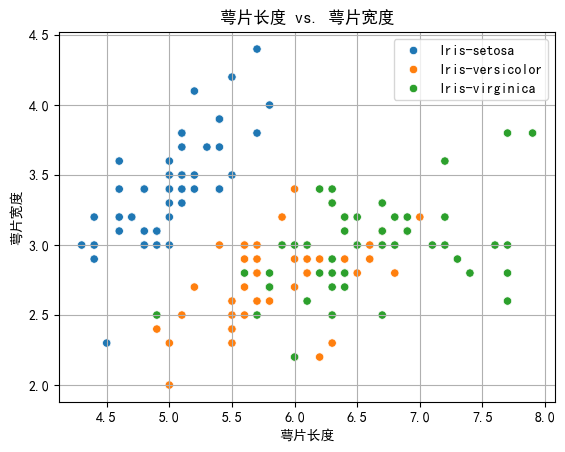

In [24]:
plt.rcParams['font.sans-serif'] = 'SimHei'#宋体，显示中文
plt.rcParams['axes.unicode_minus'] = False
sns.scatterplot(x = '萼片长度',y='萼片宽度',data = iris_data,hue = '种类')
plt.title('萼片长度 vs. 萼片宽度')
plt.xlabel('萼片长度')
plt.ylabel('萼片宽度')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('sine_wave.png')
plt.show()

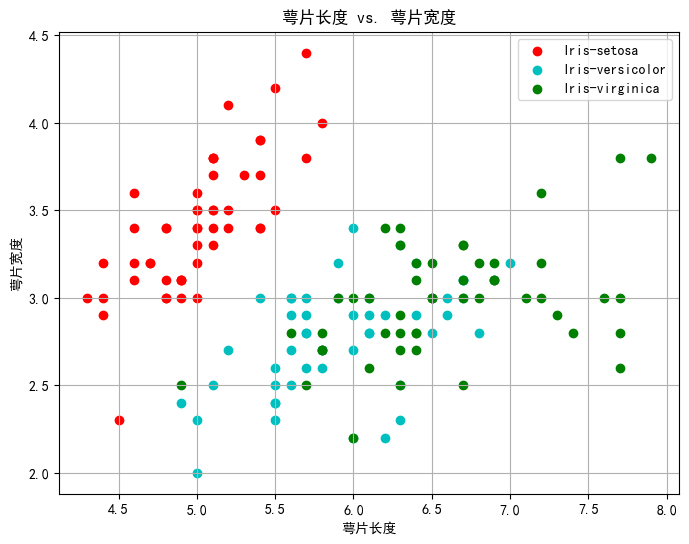

In [19]:
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'SimHei'#宋体，显示中文
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(iris_data.iloc[0:50,0], iris_data.iloc[0:50, 1], color = 'r',marker='o')
plt.scatter(iris_data.iloc[50:100:,0], iris_data.iloc[50:100, 1], color = 'c',marker='o')
plt.scatter(iris_data.iloc[100:150:,0], iris_data.iloc[100:150, 1], color = 'g',marker='o')
plt.title('萼片长度 vs. 萼片宽度')
plt.xlabel('萼片长度')
plt.ylabel('萼片宽度')
plt.grid(True)
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

#### b.直方图

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

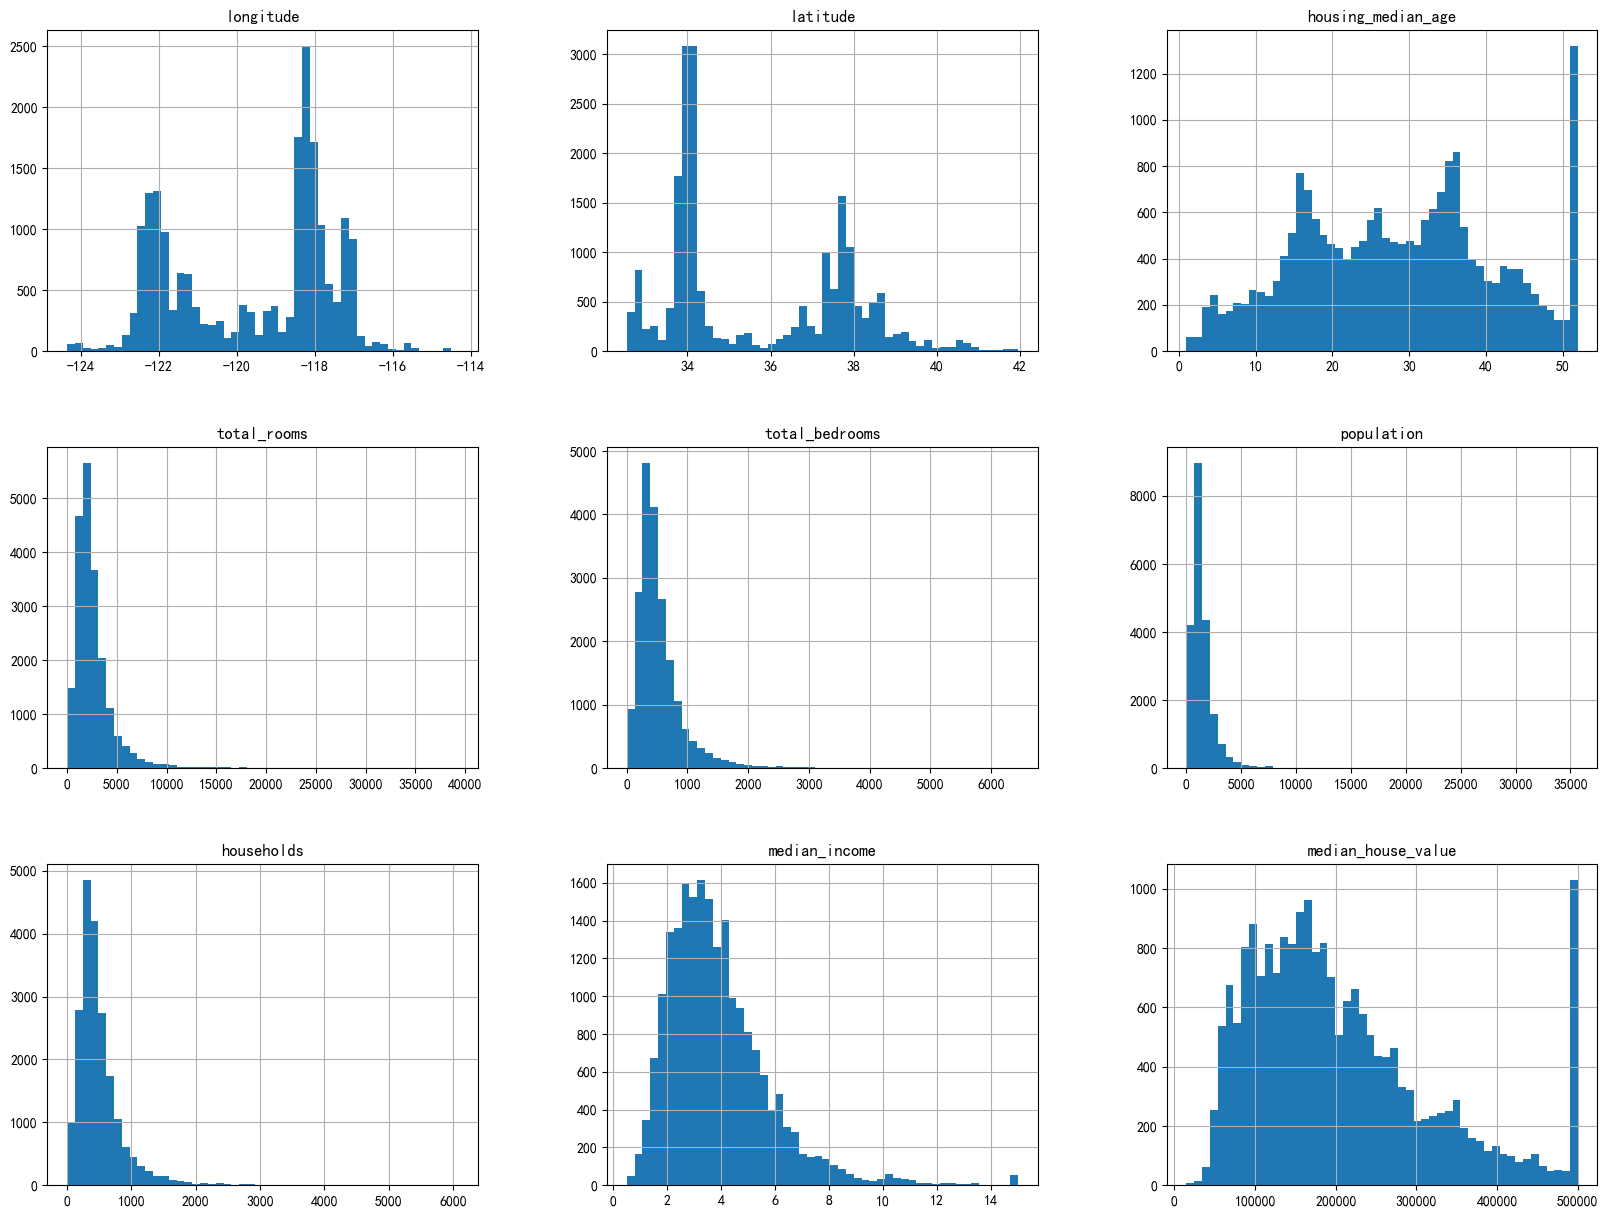

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
housing = pd.read_csv('dataset\housing.csv')
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
housing.hist(bins = 50,figsize=(20,15))

**调用 .hist() 方法绘制每个数值型特征的直方图，其中 bins=50 控制直方图的柱数，figsize=(20, 15) 设置图形的尺寸。** 

# 3. 划分数据集

## 随机采样

In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# 打印训练集和测试集的大小
print("训练集大小:", train_set.shape)
print("测试集大小:", test_set.shape)

训练集大小: (16512, 10)
测试集大小: (4128, 10)


## 分层抽样

In [19]:
# 导入必要的库
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# 在 housing 数据集中创建一个新的分类特征 'income_cat'。
# 这个特征是根据 'median_income' 将收入分成不同的类别。
housing["income_cat"] = pd.cut(
    housing['median_income'],  # 要分类的数据
    bins=[0, 1.5, 3, 4.5, 6, np.inf],  # 定义收入范围的区间
    labels=[1, 2, 3, 4, 5]  # 每个区间的标签
)

# 打印新创建的 'income_cat' 列的前10个条目，检查分类是否正确
print(housing["income_cat"].head(10))
# 初始化 StratifiedShuffleSplit 对象。
# n_splits=1: 重新洗牌和划分的次数。
# test_size=0.2: 测试集占总数据的比例（20%）。
# random_state=42: 随机数生成器的种子，用于结果的可重复性。
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# 执行分层抽样划分。因为 n_splits=1，这个循环只会运行一次。

# 'split.split()' 按照 income_cat 提供的类别进行数据的分层抽样。它返回每次分割的索引，这些索引被用来创建训练集和测试集。
for train_index, test_index in split.split(housing, housing["income_cat"]):
    # 使用 StratifiedShuffleSplit 提供的索引通过 .loc 访问器在 DataFrame 中选择训练集
    strat_train_set = housing.loc[train_index]
    # 使用 StratifiedShuffleSplit 提供的索引通过 .loc 访问器在 DataFrame 中选择测试集
    strat_test_set = housing.loc[test_index]

0    5
1    5
2    5
3    4
4    3
5    3
6    3
7    3
8    2
9    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


**strat_train_set 和 strat_test_set 是最终生成的训练集和测试集。它们保持了 median_income 的收入分布特性**

***分层抽样是基于 housing 数据集中新创建的 income_cat 特征来进行的。为了在数据集中创建一个新的分类特征，该特征将 median_income（收入中位数）按照不同的收入水平划分成多个类别。这样做的目的是确保在后续的数据分割中，每个收入水平的样本都能在训练集和测试集中得到代表。***

**练习** 
把iris数据集化训练集和测试集

In [21]:
from sklearn.model_selection import train_test_split
# 特征数据
X = iris_data.drop(columns=['种类'])
# 标签数据
y = iris_data['种类']
# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印训练集和测试集的大小
print("训练集大小:", X_train.shape)
print("测试集大小:", X_test.shape)

训练集大小: (120, 4)
测试集大小: (30, 4)


**练习3** 
请读取housing.csv数据集，要求：
* 查看其3个以上的属性
* 画出housing.csv数据集所有特征的直方图DataFrame.hist(bins=50,figsize=(20,15))
* 划分为测试集和训练集。
* 备注: 每一行表示一个街区，共有10个属性，经度、纬度、房屋年龄中位数、总房间数、总卧室数、人口数、家庭数、收入中位数、房屋价值中位数、离大海的距离

训练集大小: (16512, 10)
测试集大小: (4128, 10)


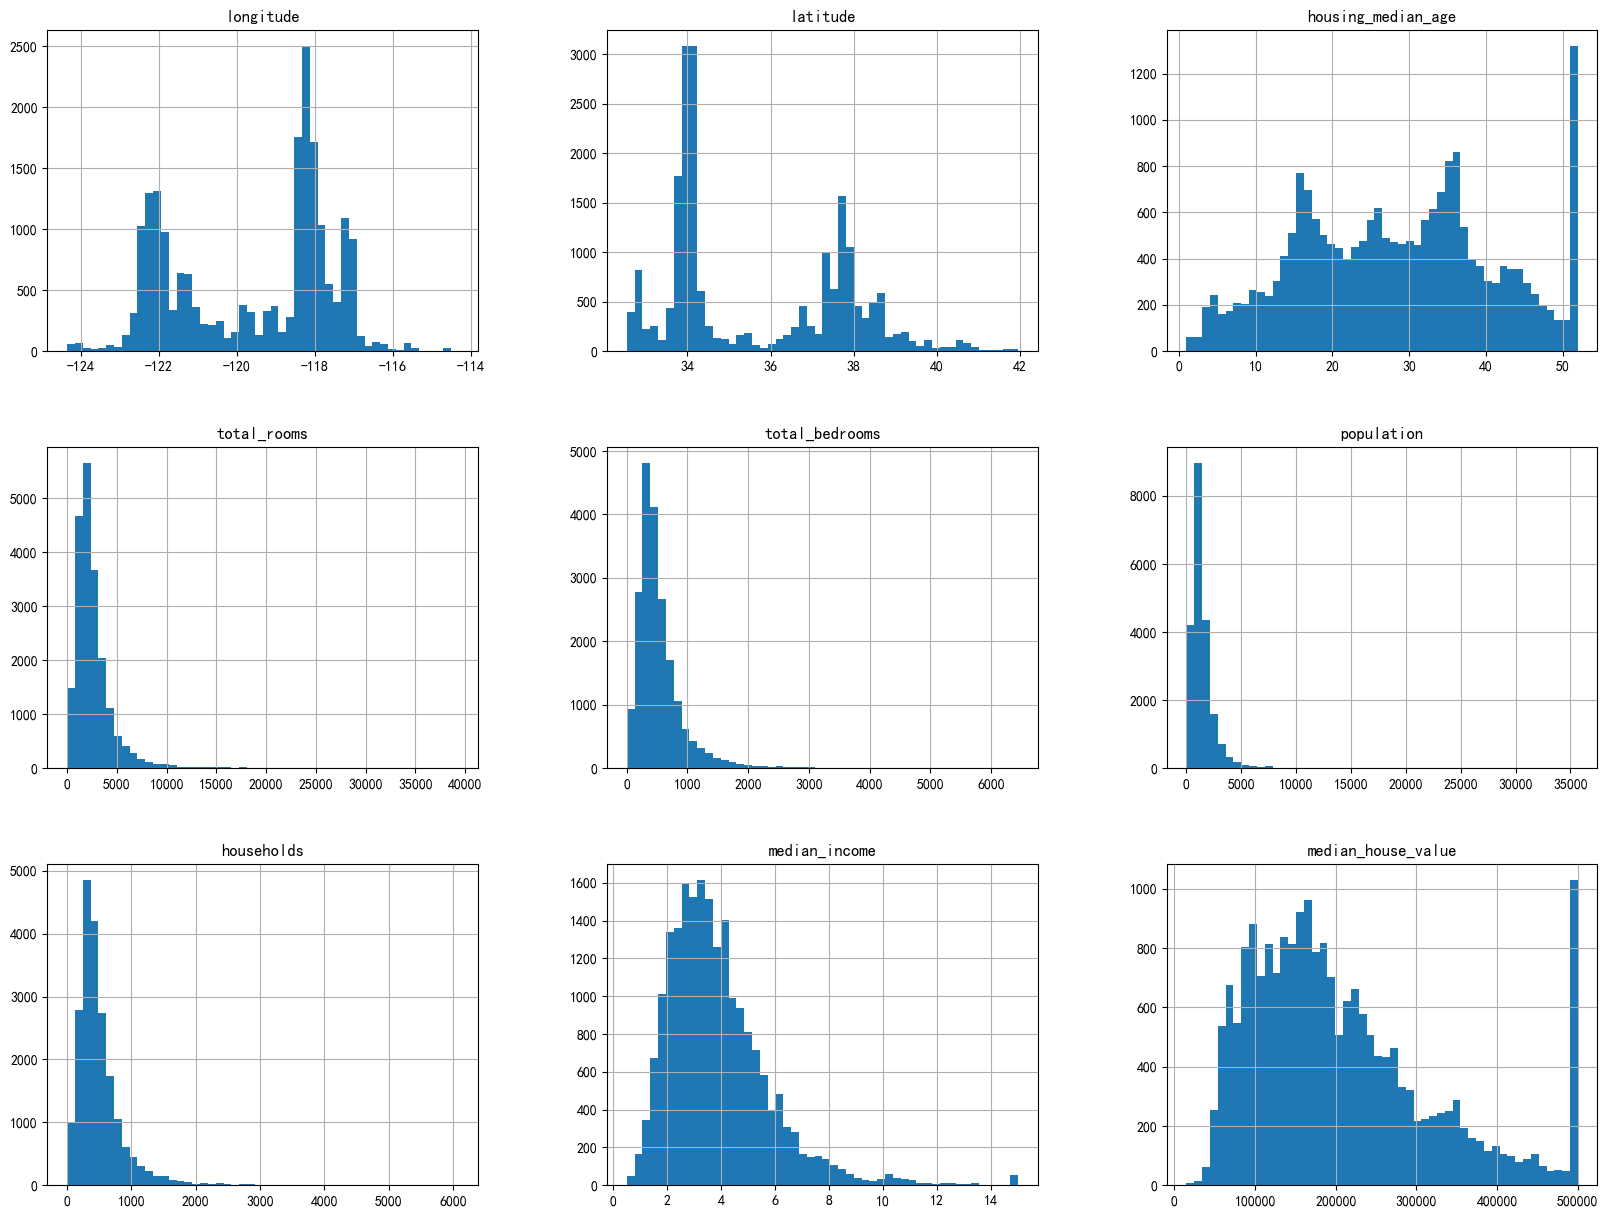

In [30]:
# 在此次完成练习3
housing = pd.read_csv('dataset\housing.csv')
housing.hist(bins=50,figsize=(20,15))

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# 打印训练集和测试集的大小
print("训练集大小:", train_set.shape)
print("测试集大小:", test_set.shape)


## 思考：为什么仅仅是输出9个特征图

# 4. 分析数据寻找规律

### （1）相关性分析

In [35]:
import pandas as pd
housing = pd.read_csv('dataset/housing.csv')
# 对分类列进行独热编码，这种转换为每一个类别创建一个新的布尔列，是数值分析和机器学习模型训练中常用的技术。
housing = pd.get_dummies(housing)
corr_matrix = housing.corr()
corr_matrix
abs(corr_matrix["median_house_value"]).sort_values(ascending=False)
#首先通过 abs() 函数取绝对值，以忽略相关性的方向（正相关或负相关），然后使用 sort_values() 方法按降序排列这些值。

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_INLAND        0.484859
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
latitude                      0.144160
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
longitude                     0.045967
population                    0.024650
ocean_proximity_ISLAND        0.023416
Name: median_house_value, dtype: float64

显示的是下面的每一个变量分别与median_house_value变量的相关性。

## (2) 特征工程

In [36]:
housing["*rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["*population_per_household"]=housing["population"]/housing["households"]
housing["*bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
corr_matrix = housing.corr()
abs(corr_matrix["median_house_value"]).sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_INLAND        0.484859
ocean_proximity_<1H OCEAN     0.256617
*bedrooms_per_room            0.255880
ocean_proximity_NEAR BAY      0.160284
*rooms_per_household          0.151948
latitude                      0.144160
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
longitude                     0.045967
population                    0.024650
*population_per_household     0.023737
ocean_proximity_ISLAND        0.023416
Name: median_house_value, dtype: float64

在把数据给机器学习算法之前，还有一件事可以做，就是尝试多种属性组合。

例如，总的房间数可能并不重要，我们真正关心的是每户的房间数。构建三个新的特征，每户的房间数（rooms_per_household），每户的人口数（population_per_household），卧室在总房间数中的比例（bedrooms_per_room）

可以发现：与总房间数或总卧室数相比，卧室占比与房价中位数的关联更强。显然，卧室数/总房间数的比例越低，房价就越高。除此之外，每户的房间数相比于总房间数和户数，也更合适预测房价。